### Here Ill be using ANN to see any change

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Input
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score

In [2]:

data = pd.read_csv('data/heart.csv')


In [3]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


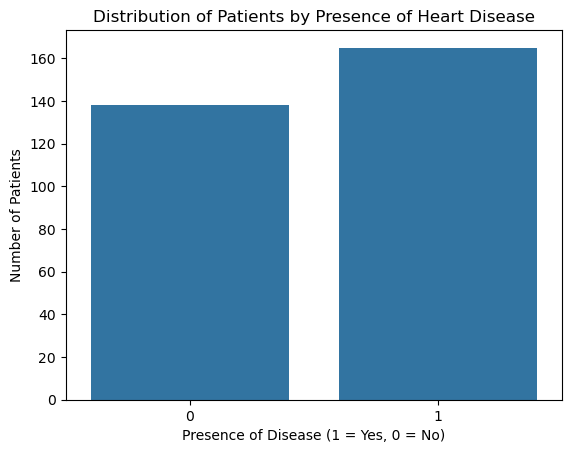

In [4]:
sns.countplot(x='target', data=data)
plt.title('Distribution of Patients by Presence of Heart Disease')
plt.xlabel('Presence of Disease (1 = Yes, 0 = No)')
plt.ylabel('Number of Patients')
plt.show()

In [5]:
X = data.drop('target', axis=1)
y = data['target']

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [8]:
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.4397 - loss: 0.8783 - val_accuracy: 0.3878 - val_loss: 0.9041
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4758 - loss: 0.7982 - val_accuracy: 0.3673 - val_loss: 0.8316
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4513 - loss: 0.7483 - val_accuracy: 0.4286 - val_loss: 0.7813
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5104 - loss: 0.6955 - val_accuracy: 0.4490 - val_loss: 0.7420
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5455 - loss: 0.6843 - val_accuracy: 0.4694 - val_loss: 0.7164
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6032 - loss: 0.6660 - val_accuracy: 0.5510 - val_loss: 0.6955
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6361 - loss: 0.6245 - val_accuracy: 0.5714 - val_loss: 0.6782
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6820 - loss: 0.6279 - val_accuracy: 0.6122 - val_loss

In [13]:
y_pred_keras = model.predict(X_test)
y_pred_keras = (y_pred_keras > 0.5).astype(int)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step 


In [14]:
loss, accuracy = model.evaluate(X_test, y_test)
f1_keras = f1_score(y_test, y_pred_keras)

print(f'Keras Model Accuracy: {accuracy:.2f}')
print(f'Keras Model F1 Score: {f1_keras:.2f}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8069 - loss: 0.5942 
Keras Model Accuracy: 0.82
Keras Model F1 Score: 0.81


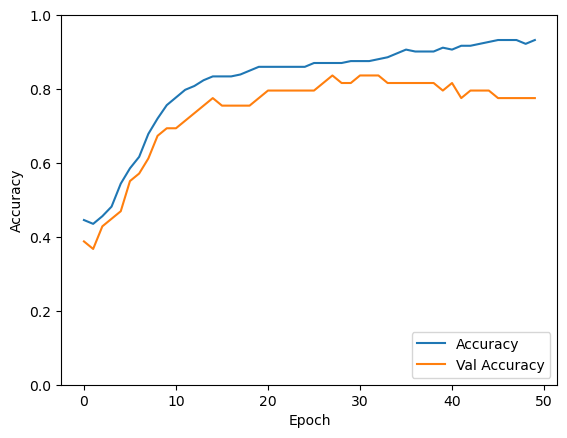

In [15]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [16]:
#increasing the model complexity
model_exp = Sequential()
model_exp.add(Input(shape=(X_train.shape[1],)))
model_exp.add(Dense(32, activation='relu'))
model_exp.add(Dense(16, activation='relu'))
model_exp.add(Dense(8, activation='relu'))
model_exp.add(Dense(1, activation='sigmoid'))

In [17]:
model_exp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

In [19]:
history_exp = model_exp.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, callbacks=[reduce_lr])

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.5694 - loss: 0.6821 - val_accuracy: 0.5306 - val_loss: 0.6824 - learning_rate: 0.0010
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5899 - loss: 0.6297 - val_accuracy: 0.5510 - val_loss: 0.6342 - learning_rate: 0.0010
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6601 - loss: 0.6096 - val_accuracy: 0.6735 - val_loss: 0.5996 - learning_rate: 0.0010
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7254 - loss: 0.5645 - val_accuracy: 0.6939 - val_loss: 0.5721 - learning_rate: 0.0010
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7820 - loss: 0.5407 - val_accuracy: 0.7143 - val_loss: 0.5476 - learning_rate: 0.0010
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7521 - loss: 0.5293 - val_accuracy: 0.6939 - val_loss: 0.5282 - learning_rate: 0.0010
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8331 - loss: 0.4618 - val_ac

In [20]:
y_pred_exp = model_exp.predict(X_test)
y_pred_exp = (y_pred_exp > 0.5).astype(int)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


In [21]:
loss_exp, accuracy_exp = model_exp.evaluate(X_test, y_test)
f1_exp = f1_score(y_test, y_pred_exp)

print(f'Experimental Keras Model Accuracy: {accuracy_exp:.2f}')
print(f'Experimental Keras Model F1 Score: {f1_exp:.2f}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8069 - loss: 0.9990 
Experimental Keras Model Accuracy: 0.82
Experimental Keras Model F1 Score: 0.82


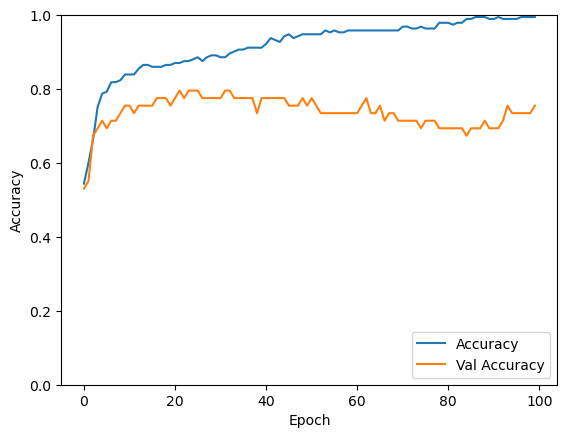

In [22]:
plt.plot(history_exp.history['accuracy'], label='Accuracy')
plt.plot(history_exp.history['val_accuracy'], label = 'Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()